<a href="https://colab.research.google.com/github/YashshwiniThakkar/YashshwiniThakkar/blob/main/7_Clustering_Assignmentt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q.1: Crime data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### DB SCAN

In [6]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [7]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [8]:
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [9]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


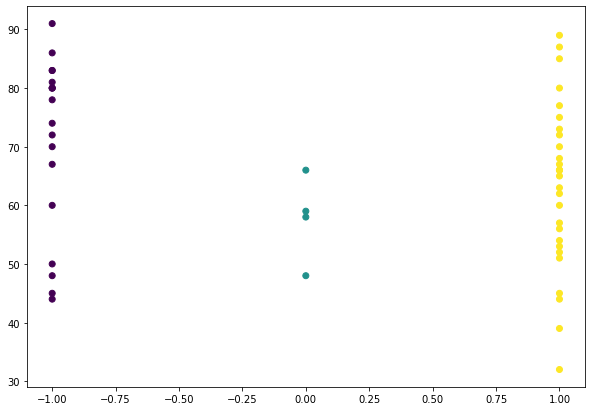

In [10]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_)

### K Means 

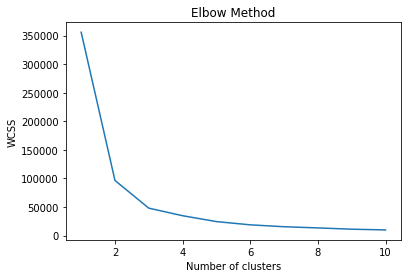

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(crime)

KMeans(n_clusters=4, random_state=42)

In [13]:
clusters_new.labels_

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [14]:
#Assign clusters to the data set
crime['clusterid_new'] = clusters_new.labels_

In [15]:
crime

,Murder,Assault,UrbanPop,Rape,clusters,clusterid_new
0,13.2,236,58,21.2,0,2
1,10.0,263,48,44.5,-1,2
2,8.1,294,80,31.0,-1,2
3,8.8,190,50,19.5,-1,0
4,9.0,276,91,40.6,-1,2
5,7.9,204,78,38.7,-1,0
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,-1,2
8,15.4,335,80,31.9,-1,2
9,17.4,211,60,25.8,-1,0


In [16]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,0,8.214286,173.285714,70.642857,22.842857,0.357143
1,1,5.590000,112.400000,65.600000,17.270000,1.000000
2,2,11.812500,272.562500,68.312500,28.375000,-0.812500
3,3,2.950000,62.700000,53.900000,11.510000,0.800000


In [17]:
crime[crime['clusterid_new']==3]

,Murder,Assault,UrbanPop,Rape,clusters,clusterid_new
10,5.3,46,83,20.2,-1,3
14,2.2,56,57,11.3,1,3
18,2.1,83,51,7.8,1,3
22,2.7,72,66,14.9,1,3
28,2.1,57,56,9.5,1,3
33,0.8,45,44,7.3,1,3
40,3.8,86,45,12.8,1,3
44,2.2,48,32,11.2,1,3
47,5.7,81,39,9.3,1,3
48,2.6,53,66,10.8,1,3


In [18]:
crime[crime['clusterid_new']==0]

,Murder,Assault,UrbanPop,Rape,clusters,clusterid_new
3,8.8,190,50,19.5,-1,0
5,7.9,204,78,38.7,-1,0
9,17.4,211,60,25.8,-1,0
20,4.4,149,85,16.3,1,0
24,9.0,178,70,28.2,1,0
29,7.4,159,89,18.8,1,0
35,6.6,151,68,20.0,1,0
36,4.9,159,67,29.3,1,0
38,3.4,174,87,8.3,1,0
41,13.2,188,59,26.9,0,0


### Hierarchial 

In [19]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [20]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

In [21]:
df_norm

,Assault,UrbanPop,Rape,clusters,clusterid_new
0,0.654110,0.440678,0.359173,0.5,0.666667
1,0.746575,0.271186,0.961240,0.0,0.666667
2,0.852740,0.813559,0.612403,0.0,0.666667
3,0.496575,0.305085,0.315245,0.0,0.000000
4,0.791096,1.000000,0.860465,0.0,0.666667
5,0.544521,0.779661,0.811370,0.0,0.000000
6,0.222603,0.762712,0.098191,1.0,0.333333
7,0.660959,0.677966,0.219638,0.0,0.666667
8,0.993151,0.813559,0.635659,0.0,0.666667
9,0.568493,0.474576,0.478036,0.0,0.000000


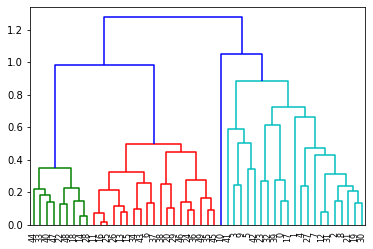

In [22]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [23]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [24]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [25]:
df_norm['h_clusterid'] = Clusters

In [26]:
df_norm.sort_values("h_clusterid")

,Assault,UrbanPop,Rape,clusters,clusterid_new,h_clusterid
0,0.654110,0.440678,0.359173,0.5,0.666667,0
32,1.000000,0.220339,0.227390,0.0,0.666667,0
31,0.715753,0.915254,0.485788,0.0,0.666667,0
30,0.821918,0.644068,0.640827,0.0,0.666667,0
39,0.801370,0.271186,0.392765,0.5,0.666667,0
27,0.708904,0.830508,1.000000,0.0,0.666667,0
23,0.732877,0.203390,0.253230,0.0,0.666667,0
21,0.719178,0.711864,0.718346,0.0,0.666667,0
19,0.873288,0.593220,0.529716,0.0,0.666667,0
12,0.698630,0.864407,0.431525,0.0,0.666667,0


## Q.2 Airlines question

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [28]:
airline=pd.read_csv('EastWestAirlines.csv')
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [29]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [30]:
# As a part of the Data cleansing we check the data for any missing/ na values
airline.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [31]:
# Now we check the data for zero variance values
(airline == 0).all()

ID                   False
Balance              False
Qual_miles           False
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
Award                False
dtype: bool

In [32]:
# We drop the features that have zero variance values
air1 = airline
air1.drop(["Qual_miles","Flight_miles_12mo","Flight_trans_12"], axis=1,inplace = True)
air1.columns

Index(['ID', 'Balance', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles',
       'Bonus_trans', 'Days_since_enroll', 'Award'],
      dtype='object')

In [33]:
air1.describe

<bound method NDFrame.describe of         ID  Balance  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143          1          1          1          174   
1        2    19244          1          1          1          215   
2        3    41354          1          1          1         4123   
3        4    14776          1          1          1          500   
4        5    97752          4          1          1        43300   
...    ...      ...        ...        ...        ...          ...   
3994  4017    18476          1          1          1         8525   
3995  4018    64385          1          1          1          981   
3996  4019    73597          3          1          1        25447   
3997  4020    54899          1          1          1          500   
3998  4021     3016          1          1          1            0   

      Bonus_trans  Days_since_enroll  Award  
0               1               7000      0  
1               2               6968      0  

In [34]:
airline_norm=StandardScaler().fit_transform(crime)
airline_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -0.21320072,
         0.50984993],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.2792043 ,
         0.50984993],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -1.2792043 ,
         0.50984993],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.2792043 ,
        -1.31104267],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -1.2792043 ,
         0.50984993],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -1.2792043 ,
        -1.31104267],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.85280287,
        -0.40059637],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.2792043 ,
         0.50984993],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -1.2792043 ,
         0.50984993],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.2792043 ,
        -1.31104267],
       [-0.57702994, -1.51224105,  1.21848371, -0.

### DB SCAN

In [35]:
dbscan = DBSCAN(eps=1.5, min_samples=21)
dbscan.fit(airline)

DBSCAN(eps=1.5, min_samples=21)

In [36]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [37]:
airline['clusters']=dbscan.labels_
airline

,ID,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,clusters
0,1,28143,1,1,1,174,1,7000,0,-1
1,2,19244,1,1,1,215,2,6968,0,-1
2,3,41354,1,1,1,4123,4,7034,0,-1
3,4,14776,1,1,1,500,1,6952,0,-1
4,5,97752,4,1,1,43300,26,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,1,1,1,8525,4,1403,1,-1
3995,4018,64385,1,1,1,981,5,1395,1,-1
3996,4019,73597,3,1,1,25447,8,1402,1,-1
3997,4020,54899,1,1,1,500,1,1401,0,-1


In [38]:
airline.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,2014.819455,73601.327582,2.059515,1.014504,1.012253,17144.846212,11.6019,4118.55939,0.370343


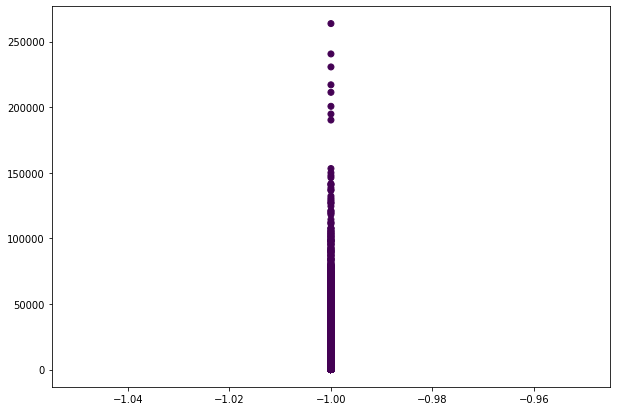

In [68]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline['clusters'],airline['Bonus_miles'], c=dbscan.labels_)

### K MEANS

In [40]:
from sklearn import preprocessing   #package for normalize
air_normalized = preprocessing.normalize(air1)
print(air_normalized)

[[ 3.44815546e-05  9.70414392e-01  3.44815546e-05 ...  2.41370882e-01
   0.00000000e+00 -3.44815546e-05]
 [ 9.77144635e-05  9.40208567e-01  4.88572317e-05 ...  3.40437191e-01
   0.00000000e+00 -4.88572317e-05]
 [ 7.11742344e-05  9.81113097e-01  2.37247448e-05 ...  1.66879855e-01
   0.00000000e+00 -2.37247448e-05]
 ...
 [ 5.15333231e-02  9.43691958e-01  3.84672728e-05 ...  1.79770388e-02
   1.28224243e-05 -1.28224243e-05]
 [ 7.30031962e-02  9.96965788e-01  1.81599990e-05 ...  2.54421587e-02
   0.00000000e+00 -1.81599990e-05]
 [ 7.70720929e-01  5.78088615e-01  1.91673944e-04 ...  2.67960174e-01
   0.00000000e+00 -1.91673944e-04]]


ID                    -1.199648
Balance               44.157932
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Days_since_enroll     -0.967505
Award                 -1.712272
clusters               0.000000
dtype: float64

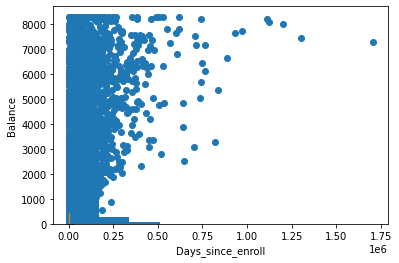

In [41]:
plt.hist(air1["Balance"])   #Univariate

plt.hist(air1["Days_since_enroll"])

plt.scatter(air1["Balance"], airline["Days_since_enroll"]);plt.xlabel('Days_since_enroll');plt.ylabel('Balance')   #Bivariate

air1.skew(axis = 0, skipna = True) 

air1.kurtosis(axis = 0, skipna = True)

In [42]:
# calculating TWSS - Total within SS using different cluster range
from sklearn.cluster import KMeans

TWSS = []
k = list(range(2, 8))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(air_normalized)
    TWSS.append(kmeans.inertia_)
    
TWSS

[355.7839280782265,
 239.96398150964967,
 184.518723946105,
 146.01446011112895,
 122.95027828503041,
 103.34244150142479]

Text(0, 0.5, 'total_within_SS')

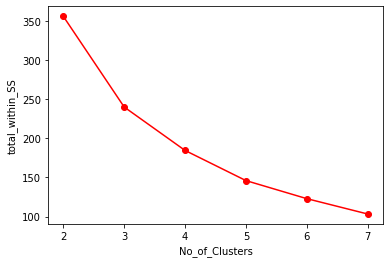

In [43]:
# Plotting the Scree plot using the TWSS from above defined function
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [44]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters, 
# as the curve is seemingly bent or showinf an elbow format at K = 4

model = KMeans(n_clusters = 4)
model.fit(air_normalized)

KMeans(n_clusters=4)

In [45]:
model.labels_

array([0, 0, 0, ..., 2, 0, 3], dtype=int32)

In [46]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [47]:
air1 = pd.read_csv("EastWestAirlines.csv")
air1['clust'] = mb # creating a  new column and assigning it to new column 

In [48]:
air1.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [49]:
air = air1.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
air.head()

,clust,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,0,2,19244,0,1,1,1,215,2,0,0,6968,0
2,0,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,4,14776,0,1,1,1,500,1,0,0,6952,0
4,2,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [50]:
# In order to see the clusters we aggregate the records within the clusters and group them by the clusters to visualize the 
# 4 nos of clear cluster formed
air.iloc[:, 1:12].groupby(air.clust).mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,,
0,1986.798958,89571.609205,178.475467,1.512809,1.008684,1.001737,8386.619192,9.003474,483.217108,1.461572,4176.478941
1,1896.113372,28167.703488,118.511628,3.299419,1.034884,1.072674,42793.354651,17.889535,681.947674,1.909884,4316.450581
2,1991.219442,74209.042348,114.636189,3.179018,1.025024,1.019249,33001.408085,17.903754,457.669875,1.346487,4167.191530
3,2429.792332,4010.888179,17.284345,1.003195,1.000000,1.000000,761.913738,2.891374,53.690096,0.226837,3313.472843


### Heirarchial

In [51]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [52]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

In [53]:
df_norm

,Assault,UrbanPop,Rape,clusters,clusterid_new
0,0.654110,0.440678,0.359173,0.5,0.666667
1,0.746575,0.271186,0.961240,0.0,0.666667
2,0.852740,0.813559,0.612403,0.0,0.666667
3,0.496575,0.305085,0.315245,0.0,0.000000
4,0.791096,1.000000,0.860465,0.0,0.666667
5,0.544521,0.779661,0.811370,0.0,0.000000
6,0.222603,0.762712,0.098191,1.0,0.333333
7,0.660959,0.677966,0.219638,0.0,0.666667
8,0.993151,0.813559,0.635659,0.0,0.666667
9,0.568493,0.474576,0.478036,0.0,0.000000


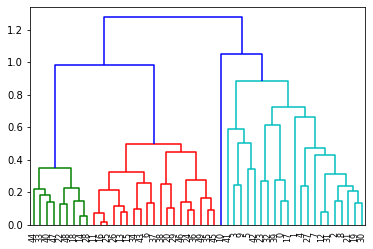

In [54]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [55]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [56]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [57]:
df_norm['h_clusterid'] = Clusters

In [58]:
df_norm.sort_values("h_clusterid")

,Assault,UrbanPop,Rape,clusters,clusterid_new,h_clusterid
0,0.654110,0.440678,0.359173,0.5,0.666667,0
32,1.000000,0.220339,0.227390,0.0,0.666667,0
31,0.715753,0.915254,0.485788,0.0,0.666667,0
30,0.821918,0.644068,0.640827,0.0,0.666667,0
39,0.801370,0.271186,0.392765,0.5,0.666667,0
27,0.708904,0.830508,1.000000,0.0,0.666667,0
23,0.732877,0.203390,0.253230,0.0,0.666667,0
21,0.719178,0.711864,0.718346,0.0,0.666667,0
19,0.873288,0.593220,0.529716,0.0,0.666667,0
12,0.698630,0.864407,0.431525,0.0,0.666667,0
